In [46]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 98.3/98.3 kB 704.8 kB/s eta 0:00:00
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=f2f87022343e11f18d477a11e73a1b1c39beabc1523dcca216fc16da87b9ddb1
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\fb\b6\e0\3c56ce12496fc2eebbe224c7b0fabc502cde0eb1f449c50239
Successfully built pydotplus


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import export_graphviz

# Load the data into a Pandas DataFrame
df  = pd.read_csv('census-income .csv')

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

Tasks to be done:

1.	Data Preprocessing:


1.	Replace all the missing values with NA.
2.	Remove all the rows that contain NA values.
3.	Remove all whitespaces from the columns.

In [3]:
df.fillna("NA", inplace=True)

# Remove rows with NA values
df.dropna(inplace=True)

# Remove whitespaces from column names
df.columns = df.columns.str.strip()

# Remove whitespaces from column values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert 'annual_income' column to binary values (0, 1)
df['annual_income'] = df['annual_income'].apply(lambda x: 0 if x.strip() == '<=50K' else 1)

# Print the preprocessed data
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  annual_income  
0          2174             0              40  United-States              0  
1             0           

2.	Data Manipulation:
Your task is to perform data manipulation to analyze the data set using various functions from the dplyr package.

Questions:

1.	Extract the “education” column and store it in “census_ed” .
2.	Extract all the columns from “age” to “relationship” and store it in “census_seq”.
3.	Extract the column number “5”, “8”, “11” and store it in “census_col”.
4.	Extract all the male employees who work in state-gov and store it in “male_gov”.
5.	Extract all the 39 year olds who either have a bachelor's degree or who are native of United States and store the result in “census_us”.
6.	Extract 200 random rows from the “census” data frame and store it in “census_200”.
7.	Get the count of different levels of the “workclass” column.
8.	Calculate the mean of “capital.gain” column grouped according to “workclass”.


In [9]:
# a) Extract the “education” column and store it in “census_ed”
census_ed = census["education"]

# b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.
census_seq = census.loc[:, "age":"relationship"]

# c) Extract the column number “5”, “8”, “11” and store it in “census_col”.
census_col = census.iloc[:, [5, 8, 11]]

# d) Extract all the male employees who work in state-gov and store it in “male_gov”.
male_gov = census[(census["sex"] == "Male") & (census["workclass"] == "State-gov")]

# e) Extract all the 39 year olds who either have a bachelor's degree or who are native of United States and store the result in “census_us”.
census_us = census[(census["age"] == 39) & ((census["education"] == "Bachelors") | (census["native-country"] == "United-States"))]

# f) Extract 200 random rows from the “census” data frame and store it in “census_200”.
census_200 = census.sample(n=200)

# g) Get the count of different levels of the “workclass” column.
workclass_count = census["workclass"].value_counts()

# h) Calculate the mean of “capital.gain” column grouped according to “workclass”.
capital_gain_mean = census.groupby("workclass")["capital-gain"].mean()

# Print the results
print(census_ed.head())
print(census_seq.head())
print(census_col.head())
print(male_gov.head())
print(census_us.head())
print(census_200.head())
print(workclass_count.head())
print(capital_gain_mean.head())

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship  
0       Never-married       Adm-clerical  Not-in-family  
1  Married-civ-spouse    Exec-managerial        Husband  
2            Divorced  Handlers-cleaners  Not-in-family  
3  Married-civ-spouse  Handlers-cleaners        Husband  
4  Married-civ-spouse     Prof-specialty           Wife  
       marital-status   race  capital-loss
0       Never-married  White             0
1  Married-civ-spouse  White             0
2            Divorced  White             0
3

# Data Visualization

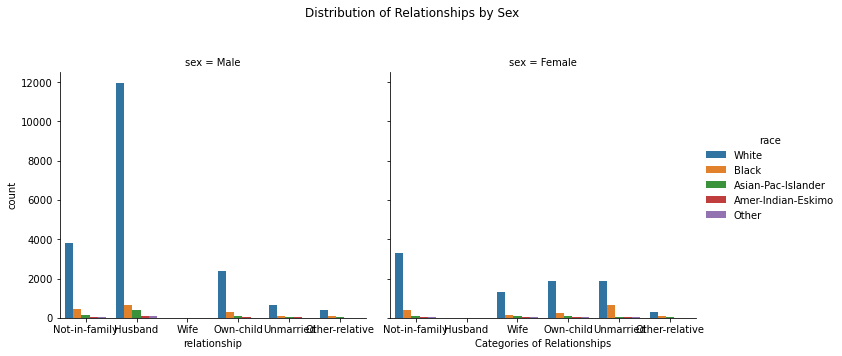

In [11]:
# Create the bar plot
sns.catplot(x='relationship', hue='race', col='sex', data=df, kind='count', dodge=True)

# Set the labels and title
plt.subplots_adjust(top=0.8)
plt.suptitle('Distribution of Relationships by Sex')
plt.xlabel('Categories of Relationships')
plt.ylabel('Count of Categories')

# Show the plot
plt.show()

b)	Build a Histogram for the “age” column with number of bins equal to 50.

1)	Fill the bars of the histogram according to yearly income column i.e., “X”
2)	Set the title of the plot to "Distribution of Age". iii)Set the legend title to "Yearly income".
3) Set the theme of the plot to black and white.


No handles with labels found to put in legend.


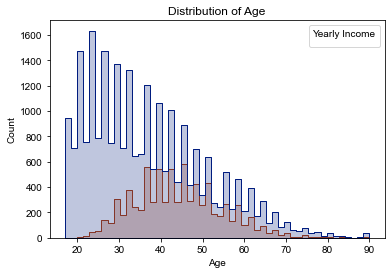

In [12]:
# Create the histogram
sns.histplot(data=df, x='age', bins=50, hue='annual_income', element='step', palette='dark')

# Set the labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Yearly Income')

# Set the theme to black and white
sns.set(style='white')

# Show the plot
plt.show()

c)	Build a scatter-plot between “capital.gain” and “hours.per.week”. Map “capital.gain” on the x- axis and “hours.per.week” on the y-axis.

1)	Set the transparency of the points to 40% and size as 2.
2)	Set the color of the points according to the “X” (yearly income) column. 
3)Set the x-axis label to “Capital Gain”, y-axis label to “Hours per Week”, title
to “Capital Gain vs Hours per Week by Income”, and legend label to “Yearly Income”.

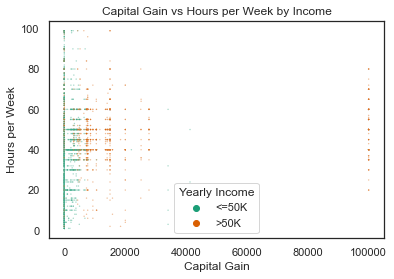

In [14]:
# Create the scatter plot
sns.scatterplot(data=census, x='capital-gain', y='hours-per-week', alpha=0.4, s=2, hue='annual_income', palette='Dark2')

# Set the labels and title
plt.xlabel('Capital Gain')
plt.ylabel('Hours per Week')
plt.title('Capital Gain vs Hours per Week by Income')
plt.legend(title='Yearly Income')

# Show the plot
plt.show()


d)	Build a box-plot between “education” and “age” column.Map “education” on the x-axis and
“age” on the y-axis.

i)	Fill the box-plots according to the “sex” column.
ii)	Set the title to "Box-Plot of age by Education and Sex".

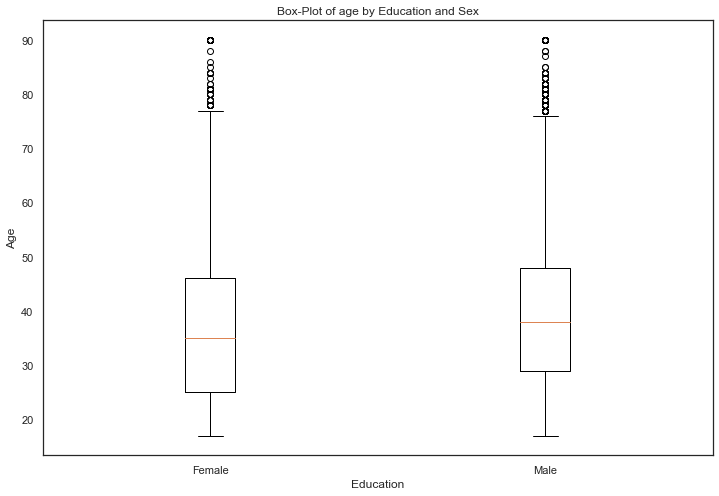

In [15]:
plt.figure(figsize=(12,8))
plt.title('Box-Plot of age by Education and Sex')
plt.xlabel('Education')
plt.ylabel('Age')
plt.boxplot([census[census['sex'] == 'Female']['age'], census[census['sex'] == 'Male']['age']], labels=['Female', 'Male'])
plt.show()

# Linear Regression

In [ ]:
['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [21]:
data_encoded = pd.get_dummies(census, columns=['education'])

# Divide the dataset into training and test sets in 70:30 ratio
train_df, test_df = train_test_split(data_encoded, test_size=0.3, random_state=0)

# Build a linear model on the test set where the dependent variable is "hours-per-week" 
# and independent variables are "education-num" and the encoded education columns
lr_model = LinearRegression()
lr_model.fit(train_df[['education-num', 'education_10th', 'education_11th', 'education_12th', 
                       'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 
                       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 
                       'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 
                       'education_Some-college']], train_df['hours-per-week'])

# Predict the values on the train set
train_predictions = lr_model.predict(train_df[['education-num', 'education_10th', 'education_11th', 'education_12th', 
                       'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 
                       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 
                       'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 
                       'education_Some-college']])

# Find the root-mean-square error (RMSE)
rmse = mean_squared_error(train_df['hours-per-week'], train_predictions, squared=False)
print("RMSE on train set:", rmse)

RMSE on train set: 12.062218264218673


# Logistic Regression Model

In [22]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(census, test_size=0.35, random_state=42)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion Matrix:
[[8686    0]
 [2711    0]]
Accuracy: 0.7621303851890848


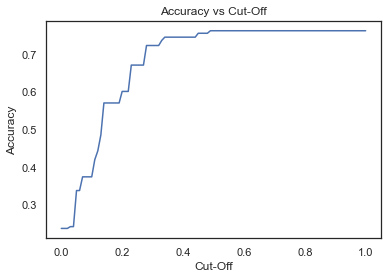

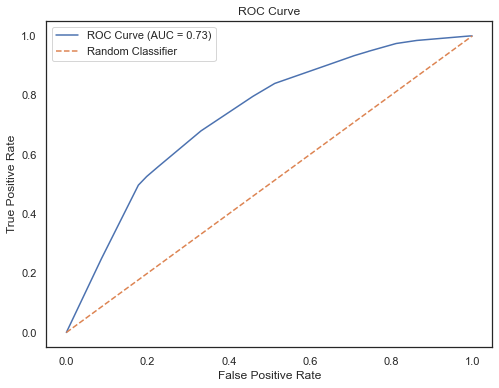

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder()
train_encoded = encoder.fit_transform(train_df[['occupation']])
test_encoded = encoder.transform(test_df[['occupation']])

# Encode target variable
lb = LabelBinarizer()
train_target = lb.fit_transform(train_df['annual_income'])
test_target = lb.transform(test_df['annual_income'])

# Train the model on the training set
lr_model = LogisticRegression()
lr_model.fit(train_encoded, train_target)

# Predict the values on the test set
y_prob = lr_model.predict_proba(test_encoded)
y_pred = (y_prob[:, 1] > 0.5).astype(int)

# Convert binary labels back to original labels
y_pred_labels = lb.inverse_transform(y_pred)

# Encode test target variable to binary labels
test_target_binary = lb.transform(test_df['annual_income'])

# Calculate accuracy for different cut-offs
cut_offs = [i/100 for i in range(0, 101, 1)]
accuracies = []
for cut_off in cut_offs:
    y_pred_cut_off = (y_prob[:, 1] > cut_off).astype(int)
    y_pred_labels = lb.inverse_transform(y_pred_cut_off)
    accuracy = accuracy_score(test_df['annual_income'], y_pred_labels)
    accuracies.append(accuracy)

# Plot accuracy vs cut-off and pick an ideal value for cut-off
import matplotlib.pyplot as plt
plt.plot(cut_offs, accuracies)
plt.xlabel('Cut-Off')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Cut-Off')

# Build a confusion matrix and find the accuracy
conf_matrix = confusion_matrix(test_target_binary, y_pred)
accuracy = accuracy_score(test_target_binary, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy}')

# Plot the ROC curve and find the auc(Area Under Curve)
fpr, tpr, thresholds = roc_curve(test_target_binary, y_prob[:, 1])
auc = roc_auc_score(test_target_binary, y_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Multiple Linear Regression

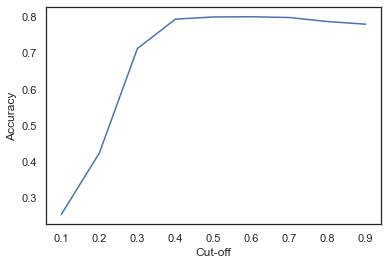

Confusion matrix:
[[4784  158]
 [1147  424]]
Accuracy: 0.7996315062183326


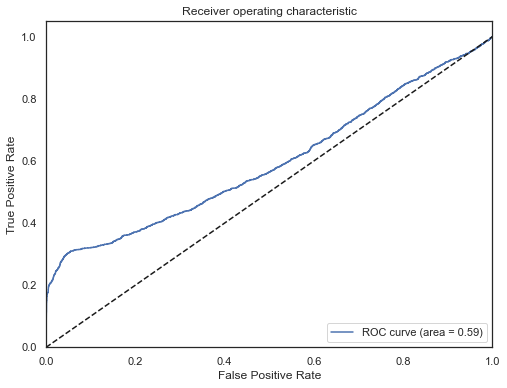

In [40]:


# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Separate the target variable from the features
X_train = train_df.drop(['annual_income'], axis=1)
y_train = train_df['annual_income']

X_test = test_df.drop(['annual_income'], axis=1)
y_test = test_df['annual_income']

# Use one-hot encoding for categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the test set with the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Fit the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_prob = clf.predict_proba(X_test)
y_pred = [1 if p[1] >= 0.5 else 0 for p in y_prob]

# Plot accuracy vs cut-off
acc_scores = []
cut_offs = []
for i in range(1, 10):
    cut_off = i / 10
    cut_offs.append(cut_off)
    y_pred_cut_off = [1 if p[1] >= cut_off else 0 for p in y_prob]
    acc_score = accuracy_score(y_test, y_pred_cut_off)
    acc_scores.append(acc_score)
plt.plot(cut_offs, acc_scores)
plt.xlabel('Cut-off')
plt.ylabel('Accuracy')
plt.show()

# Build the confusion matrix and find the accuracy
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_mat)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# Plot the ROC curve and find the auc(Area Under Curve)
fpr, tpr, thresholds = roc_curve(test_df['annual_income'], y_prob[:, 1])
auc = roc_auc_score(test_df['annual_income'], y_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [18]:
from sklearn.preprocessing import LabelEncoder
# Divide the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [19]:
# Load the dataset
# Label encode the categorical variables
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['annual_income'] = le.fit_transform(df['annual_income'])

In [ ]:
# Define the independent and dependent variables
X_train = train_df.drop('annual_income', axis=1)
y_train = train_df['annual_income']
X_test = test_df.drop('annual_income', axis=1)
y_test = test_df['annual_income']

In [21]:
# Build the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

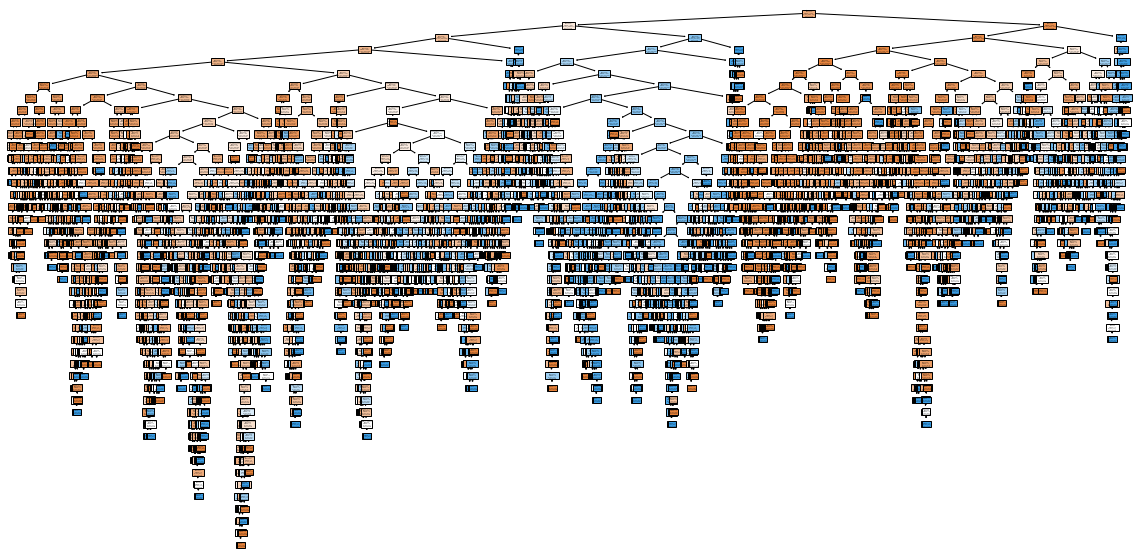

In [22]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

In [23]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Build the confusion matrix and find the accuracy
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_mat)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Confusion matrix:
[[6520  935]
 [ 890 1424]]
Accuracy: 0.8131845634148838


# Random Forest

In [26]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
enc = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(enc.fit_transform(df[cat_cols]))
encoded_cols.columns = enc.get_feature_names(cat_cols)
df_encoded = pd.concat([df.drop(cat_cols, axis=1), encoded_cols], axis=1)

In [27]:
# Split the data into training and test sets
X = df_encoded.drop(['annual_income'], axis=1)
y = df_encoded['annual_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Build the random forest model
rfc = RandomForestClassifier(n_estimators=300, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [30]:
# Predict values on the test set
y_pred = rfc.predict(X_test)

In [31]:
# Build a confusion matrix and calculate the accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[4595  347]
 [ 570 1001]]
Accuracy: 0.8592046675879011
